In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
df=pd.read_csv('data.csv')
# print(df.head())
# create design matrix X and target vector y
X = np.array(df.ix[:, 0:13]) 	# end index is exclusive
y = np.array(df['income']) 	# another way of indexing a pandas df
# print(X)
# print(y)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=25)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print (accuracy_score(y_test,pred))
# print(pred)

0.801934592354


In [2]:
df.shape

(32561, 15)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,1,13,3,9,4,1,2,2174,0,40,1,0
1,50,2,83311,1,13,1,5,3,1,2,0,0,13,1,0
2,38,1,215646,4,9,2,7,4,1,2,0,0,40,1,0
3,53,1,234721,3,7,1,7,3,5,2,0,0,40,1,0
4,28,1,338409,1,13,1,6,1,5,1,0,0,40,13,0


In [4]:

k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))


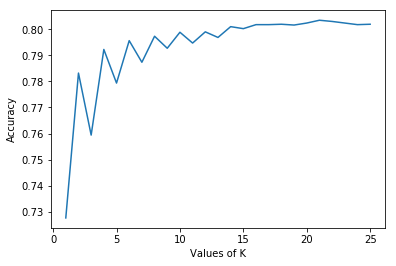

In [5]:
import matplotlib.pyplot as plt

# for plotting the graph inside the notebook itself
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')


In [10]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.75940426838630426

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.81544603101489332

In [18]:
k_values = [i for i in range(2,31)]

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'weights':('uniform', 'distance'), 'n_neighbors':k_values}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'weights': ('uniform', 'distance'), 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [30]:
print(grid.best_score_)
print(grid.best_params_)

0.801572433279
{'n_neighbors': 30, 'weights': 'distance'}


In [31]:
knn = KNeighborsClassifier(n_neighbors=30, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='distance')

Tried poking around with this data and specifically with kNN, got to know that `KNeighborsClassifier(n_neighbors=30, weights='distance')` works best with `0.801572433279` accuracy.